In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/train.csv')
df.info()

c:\users\79514\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279792 entries, 0 to 279791
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 279792 non-null  object 
 1   floor                                103555 non-null  object 
 2   id                                   279792 non-null  object 
 3   lat                                  279792 non-null  float64
 4   lng                                  279792 non-null  float64
 5   osm_amenity_points_in_0.001          279792 non-null  int64  
 6   osm_amenity_points_in_0.005          279792 non-null  int64  
 7   osm_amenity_points_in_0.0075         279792 non-null  int64  
 8   osm_amenity_points_in_0.01           279792 non-null  int64  
 9   osm_building_points_in_0.001         279792 non-null  int64  
 10  osm_building_points_in_0.005         279792 non-null  int64  
 11  osm_building_

In [3]:
from typing import List

def get_group_of_columns(df: pd.DataFrame, substrings: List[str]) -> List[pd.DataFrame]:
    groups = []
    for sub in substrings:
        groups.append(df.loc[:, df.columns.intersection([key for key in df if sub in key])])
    return groups

def check_feature(substrings, feature):
    for sub in substrings:
        if sub in feature:
            return 0
    return 1

In [ ]:
df_categoria

In [4]:
df_categorial = df.select_dtypes(include=[object])
substrings = ['osm', 'reform']
df_osm, df_reform = get_group_of_columns(df, substrings)



few_df = df.drop([feature for feature in df if not check_feature(substrings, feature)], 1).select_dtypes(exclude=[object])

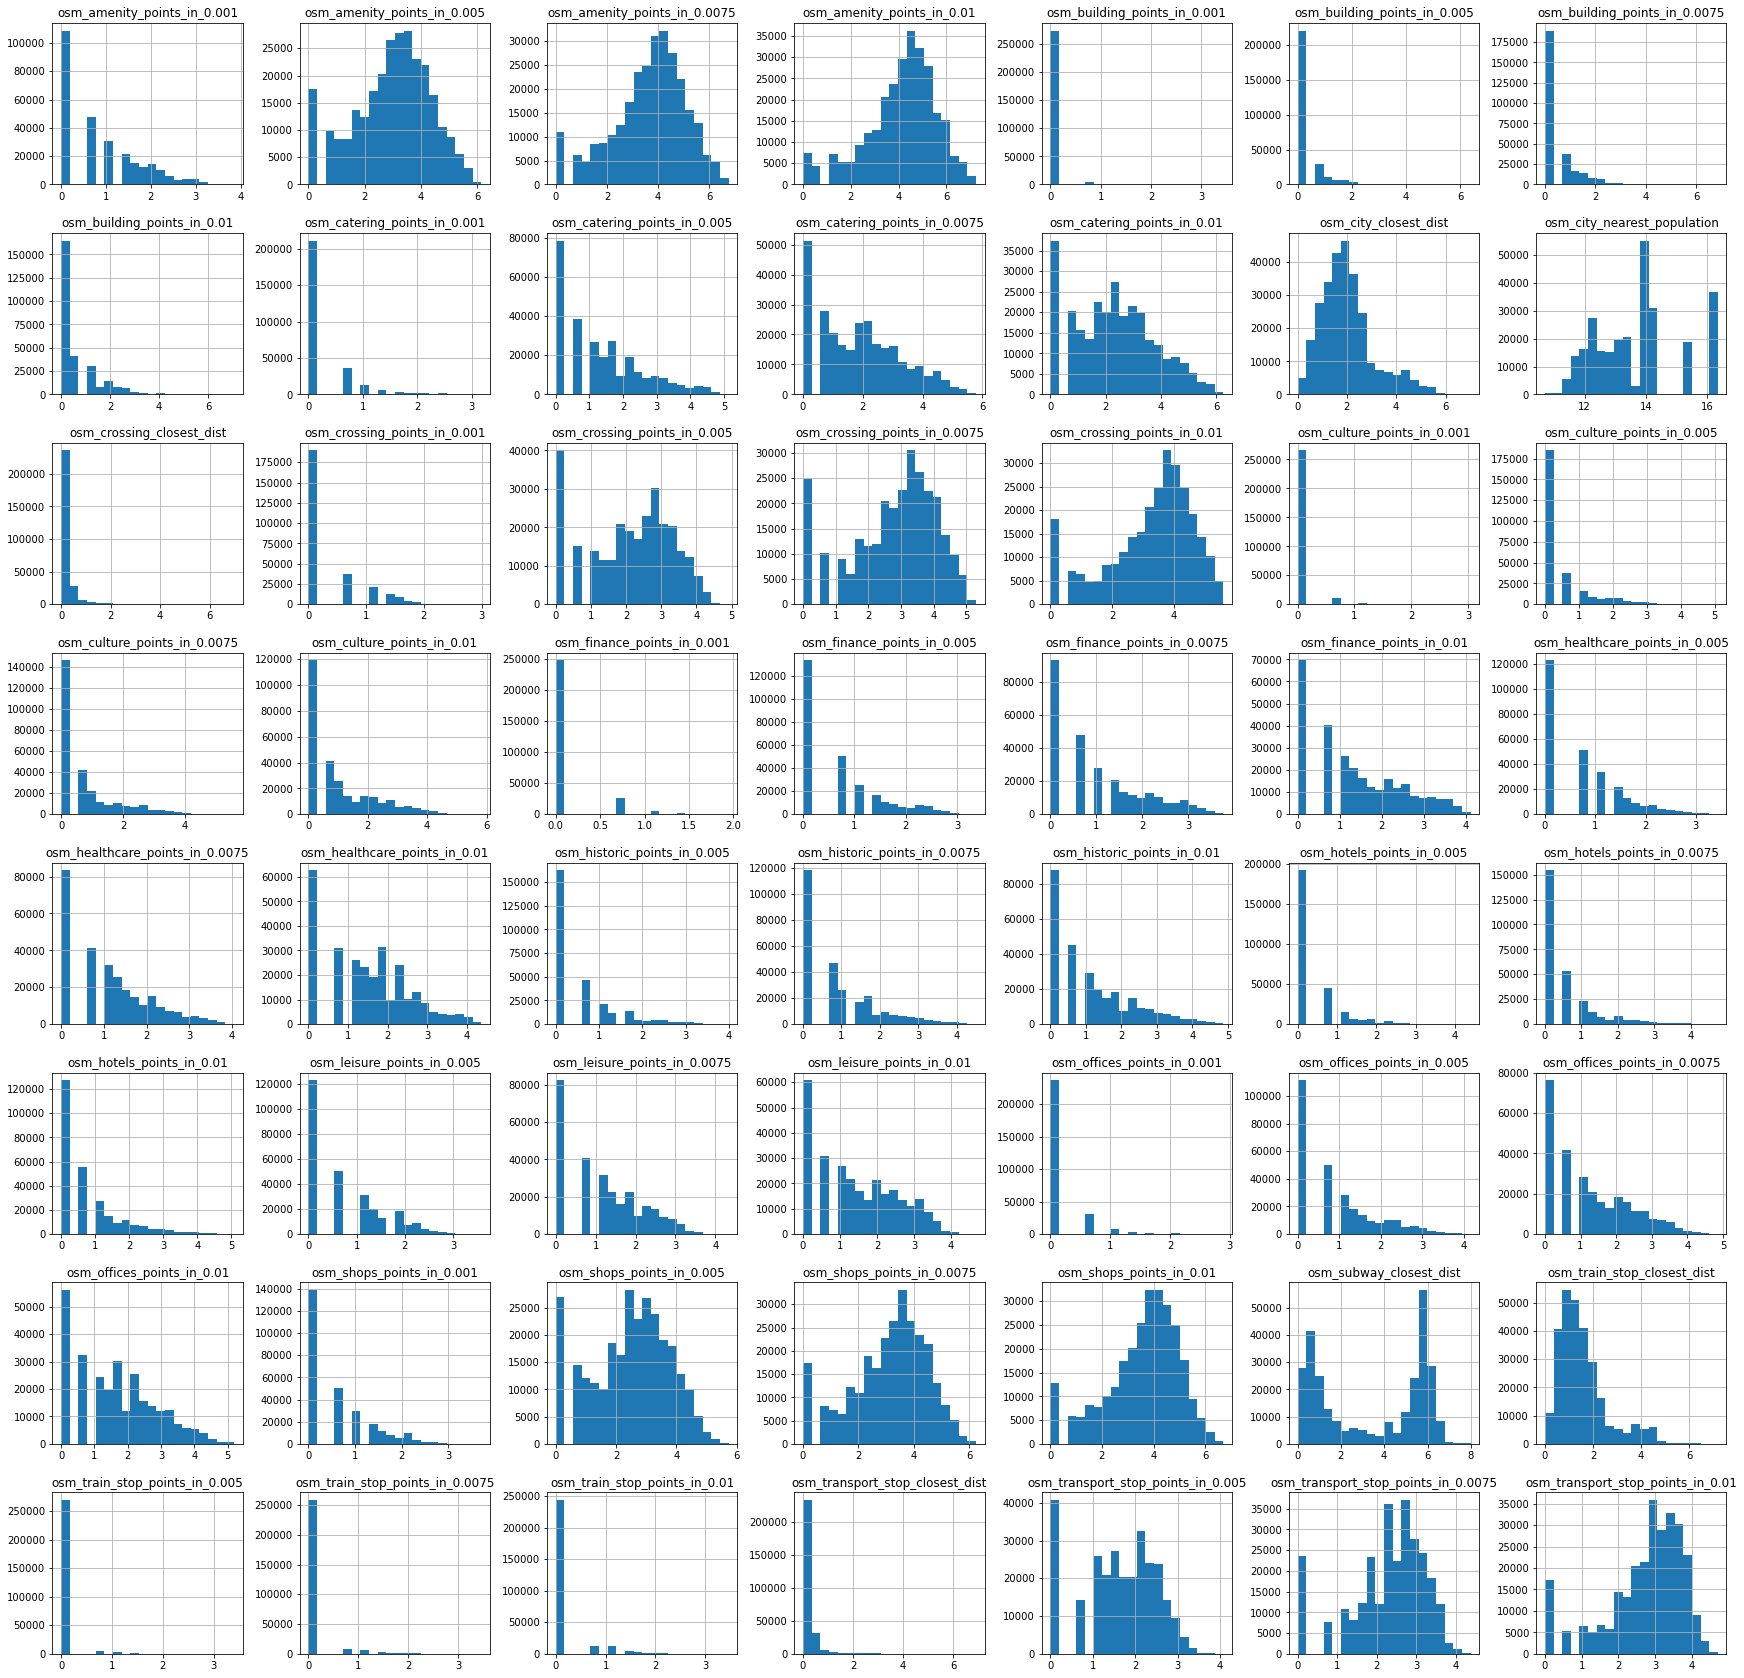

In [16]:
import matplotlib.pyplot as plt
from numpy import log1p

df_osm.drop('osm_city_nearest_name', 1).apply(log1p).hist(figsize=(30, 30), bins=20)
plt.show()

In [4]:
coords = df.iloc[:, 3:5]
coords

,lat,lng
0,57.998207,56.292797
1,55.574284,39.543835
2,57.619140,39.850525
3,53.897083,87.108604
4,55.802590,37.487110
...,...,...
279787,56.459183,84.979334
279788,59.936954,30.356383
279789,54.729233,20.514968
279790,55.360680,86.081460


In [38]:
df_num = df.select_dtypes(exclude=[object]).dropna()

In [40]:
from sklearn.model_selection import train_test_split
    

X_train, X_test, y_train, y_test = train_test_split(df_num.dropna().drop('per_square_meter_price', 1), df_num['per_square_meter_price'], test_size=0.33, random_state=42)

In [17]:
from geopy.geocoders import Nominatim
from geopy import distance

geolocator = Nominatim(user_agent="example app")

In [19]:
df['city'][0]

'Пермь'

In [26]:
i = 0
geolocator.geocode(f"{df['city'][i]}, {str(df['region'][i])}, Russia")

Location(Пермь, Пермский край, Приволжский федеральный округ, Россия, (58.0230679, 56.232803119037456, 0.0))

In [37]:
coords

,lat,lng
0,57.998207,56.292797
1,55.574284,39.543835
2,57.619140,39.850525
3,53.897083,87.108604
4,55.802590,37.487110
...,...,...
279787,56.459183,84.979334
279788,59.936954,30.356383
279789,54.729233,20.514968
279790,55.360680,86.081460


In [66]:
distances = get_distances(coords.to_records(index=False).tolist(), df['city'].to_list(), df['region'].to_list())


  0%|                                                                           | 26/279792 [00:12<38:30:04,  2.02it/s]

KeyboardInterrupt: 

In [56]:
distances

279792

In [48]:
categorial_features = df.select_dtypes(include=[object])

In [49]:
categorial_features

,city,floor,id,osm_city_nearest_name,region,street,date
0,Пермь,NaN,COL_0,Пермь,Пермский край,S27289,2020-01-05
1,Шатура,NaN,COL_1,Орехово-Зуево,Московская область,S17052,2020-01-05
2,Ярославль,NaN,COL_2,Ярославль,Ярославская область,S16913,2020-01-05
3,Новокузнецк,NaN,COL_3,Новокузнецк,Кемеровская область,S10148,2020-01-05
4,Москва,NaN,COL_4,Химки,Москва,S1338,2020-01-05
...,...,...,...,...,...,...,...
279787,Томск,1.0,COL_280111,Томск,Томская область,S11114,2020-08-23
279788,Санкт-Петербург,1.0,COL_280479,Санкт-Петербург,Санкт-Петербург,S28440,2020-08-23
279789,Калининград,3.0,COL_280518,Калининград,Калининградская область,S6671,2020-08-23
279790,Кемерово,1.0,COL_280529,Кемерово,Кемеровская область,S17667,2020-08-23
